# **데이터 크롤링**

## **크롤링이란?**
> 크롤러(crawler)는 자동화된 방법으로 웹을 탐색하는 컴퓨터 프로그램, 정보를 긁어온다

'웹 크롤링'(web crawling)??  
'데이터 크롤링'(data crawling)!!  

우리는 매일 크롤러도 사용하고 있습니다.

## **웹 크롤링**
> 웹 서비스 내 정보를 수집하는 일

>> 필요한 정보가 있다면?  
API 확인 -> 없으면 직접 크롤링  
    
> 다만 서비스 제공자의 입장에서는??

### 웹 서핑을 하는 의식의 흐름
> - 브라우저 오픈  
> - 원하는 인터넷페이지 주소 입력  
> - 화면이 열리면 찾고자 하는 정보를 스크롤 하면서 찾기  
> - 문자, 그림, 동영상 조회  

### 웹 크롤링 하는 의식의 흐름
> - 정보를 가져오고자 하는 url 정의
> - url 정보로 requests로 정보 요청
> - text 정보를 html로 변환
> - html에서 우리가 필요한 정보만 선별

### 웹 크롤링을 위해 BeautifulSoup 사용
> - requests는 요청을 받기는 하지만 text로만 받음  
> - API는 통신을 위해 정형화 된 데이터 형태의 text  
> - 우리가 원하는 데이터로 가공하기 위해 편의상 html로 변환  
> - text를 html로 변환하는 모듈이 beautifulSoup

### 간단한 데이터 크롤링으로 기본 개념잡기

In [1]:
# 필요패키지 import
import numpy as np
import pandas as pd
import requests # 크롤링에 사용하는 패키지
from bs4 import BeautifulSoup # html 변환에 사용함

#### 네이버 메인페이지 크롤링

In [ ]:
# 네이버 메인페이지
# url정의, 문자열 형식으로 전달, https:// 포함
url = "https://www.naver.com"

# requests로 url에 정보요청
# requests 파이썬이 컴퓨터간 통신체계에 해당하는 명령어들을 사용하도록 만든 패키지
# 해당코드를 실행시키는 순간 서비스제공자에게 정보요청을 함
resp = requests.get(url)

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, 'html.parser')

# html 내에서 우리가 보고 싶은 정보만 선별
html.select('img')

#### 다음 뉴스페이지 크롤링

In [23]:
# 다음 뉴스 페이지 크롤링
# url정의
url = "https://news.daum.net/"

# requsts로 url에 정보요청
resp = requests.get(url)

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, 'html.parser')

# html 내에서 뉴스헤더 선별
html.select("a.link_txt")[0].text.strip() 
# 리스트 - 인덱싱, 슬라이싱 가능

'인수위 "코로나 후유증 대책 추진.. 감염병등급 상향 논의 없어 "'

In [33]:
for news in html.select("a.link_txt")[:-13]:
  print(news.text.strip().replace('[','').replace(']',''))
  print('-'*70)

인수위 "코로나 후유증 대책 추진.. 감염병등급 상향 논의 없어 "
----------------------------------------------------------------------
공포의 바이오株, 외국인도 수백억 물렸다..급락하는 HLB‧휴마시스‧바이오니아
----------------------------------------------------------------------
車시트에 앉는 순간 '토털케어' 시작된다
----------------------------------------------------------------------
BMW 전기차 'i4' 시승기.. 폭발적 가속력 · 안정적 코너링
----------------------------------------------------------------------
인수위, 코로나 100일 프로젝트·종합방역대책 오늘 확정..安 27일 직접 발표
----------------------------------------------------------------------
검수완박 강타에..'오직 민생' 거리두던 尹당선인도 침묵깨나
----------------------------------------------------------------------
먹는 코로나약 팍스로비드, 美서도 "제대로 활용 못한다"
----------------------------------------------------------------------
김오수 "국회의장 중재안 전혀 알지 못했다..중재안의 '중'자도 못들어"
----------------------------------------------------------------------
'백신 반대' 日정치인, 여중생 임신·출산시켜 논란
----------------------------------------------------------------------
'롱코비드' 기침 후유증엔 쌍화차..증상 심하면 한약 처방도 도움
-

### 실제 개발자가 작성한 코드로 확인된다
> 정제되지 않은 데이터로 가독성이 좋지 않음  
우리는 이 중에서 우리가 원하는 정보를 선별해서 가져오는 작업을 진행합니다.  
그러기에 html의 기본 구성을 살펴보도록 하겠습니다.  

#### 웹 페이지의 구성
> **HTML(Hyper Text Markup Language)**  
www 를 구성하는데 사용하는 국제표준 언어로서 컨텐츠와 레이아웃을 담고 있다

> **<태그>** 내용 **</태그>**  
<tag이름 class="class이름1 class이름2" id="주민번호" href="주소"></tag이름>

> 형태나 속성을 묘사하기 위한 구조적 언어 : HTML, CSS (계층이 있음)  
웹의 작동 및 제어를 위한 프로그래밍 언어 :  Js

#### 셀렉터
> 용도 : html에서 내가 원하는 내용을 찾아내기 위해서  
<span class="news" id="1234">비비고 왕교자</span>
<span class="product" id="1235">비비고 볶음밥</span>

>> 단일 셀렉터  
html.select('span')  # 태그 이름이 span인 친구들을 다 들고옴  
tag : span  
class(별명, 그룹명) : .news

<span class="news" id="1234">비비고 왕교자</span>
<span class="product" id="1235">비비고 볶음밥</span>

>> 클래스 포함 셀렉터
html.select('span.news')

<span class="news" id="1234">비비고 왕교자</span>

>> id 포함 셀렉터
id(고유값) : #1234
html.select('span#1234')

<span class="news" id="1234">비비고 왕교자</span>

#### 복합 셀렉터
    1. 조합 셀렉터
    <span>1</span>
    <span class="txt">2</span>
    <em class="txt">3</em>
    
    태그 이름이 span이고 클래스 이름은 txt인 라인을 찾고 싶다. : span.txt 
    em 태그 중에서 class가 txt 인 라인을 찾고 싶다. : em.txt

    2. 경로 셀렉터
    
    <ul>
        <li><span>이걸 찾으려면?</span></li>
    </ul>
    <span>이건 아님</span>

    ul 태그안 li 태그 안 span 라인을 찾는다
    ul > li > span 혹은 ul li span

In [51]:
import time

In [52]:
for i in range(5):
  time.sleep(2)
  print(i)

0
1
2
3
4


In [75]:
key_list = ['슬기로운의사생활', '도깨비', '오징어게임']
for item in key_list:
  print(item)

슬기로운의사생활
도깨비
오징어게임


In [79]:
# 슬의생 도깨비 오징어게임
# 슬의생 드라마소개 크롤링
key_list = ['슬기로운의사생활', '도깨비', '오징어게임']
for key_word in key_list:
    
    time.sleep(2)
    url = f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={key_word}'

    # requsts로 url에 정보요청
    resp = requests.get(url)

    # 정보를 html 변환 (보기 쉽게)
    html = BeautifulSoup(resp.text, 'html.parser')

    print(key_word, html.select('span.desc')[0].text)


슬기로운의사생활 누군가는 태어나고 누군가는 삶을 끝내는, 인생의 축소판이라 불리는 병원에서 평범한 듯 특별한 하루하루를 살아가는 사람들과 눈빛만 봐도 알 수 있는 20년지기 친구들의 케미스토리를 담은 드라마
도깨비 불멸의 삶을 끝내기 위해 인간 신부가 필요한 도깨비, 그와 기묘한 동거를 시작한 기억상실증 저승사자. 그런 그들 앞에 '도깨비 신부'라 주장하는 '죽었어야 할 운명'의 소녀가 나타나며 벌어지는 신비로운 낭만 설화
오징어게임 456억 원의 상금이 걸린 의문의 서바이벌에 참가한 사람들이 최후의 승자가 되기 위해 목숨을 걸고 극한의 게임에 도전하는 이야기를 담은 넷플릭스 시리즈


In [ ]:
# 해당 드라마 뉴스 제목 크롤링


## 다음에서 로또번호 가져오기

In [50]:
# url 설정
url = "https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EB%A1%9C%EB%98%90%EB%B2%88%ED%98%B8"
# requests로 데이터 요청하기
resp = requests.get(url)
# html로 변환
html = BeautifulSoup(resp.text, 'html.parser')
# 데이터 선별
for prize in html.select('div.prize'):
  print(prize.text.strip())
for lotto_num in html.select("div.lottonum"):
  print(lotto_num.text.strip())

1012회 당첨번호 (2022.04.23 추첨)
5 11 18 20 35 45 보너스 3


## 다음에서 로또번호 가져와 볼께요 몽땅 다 가져옵니다

In [105]:
# url 설정
count = 1013
lottery = {}
for i in range(10):
  seed = np.random.randint(100)
  np.random.seed(seed)
  a = np.random.randint(5)
  time.sleep(a)
  count -= 1
  url = f"https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query={count}회 로또당첨번호"
  resp = requests.get(url)
  html = BeautifulSoup(resp.text, 'html.parser')
  for ball in html.select('div.win_ball'):
    print(f"{count}회차 : " + ball.text.strip())
    lottery[f"{count}회차"] = ball.text.strip()

1012회차 : 5 11 18 20 35 45   3
1011회차 : 1 9 12 26 35 38   42
1010회차 : 9 12 15 25 34 36   3
1009회차 : 15 23 29 34 40 44   20
1008회차 : 9 11 30 31 41 44   33
1007회차 : 8 11 16 19 21 25   40
1006회차 : 8 11 15 16 17 37   36
1005회차 : 8 13 18 24 27 29   17
1004회차 : 7 15 30 37 39 44   18
1003회차 : 1 4 29 39 43 45   31


In [95]:
lottery

{'1003회차': '1 4 29 39 43 45   31',
 '1004회차': '7 15 30 37 39 44   18',
 '1005회차': '8 13 18 24 27 29   17',
 '1006회차': '8 11 15 16 17 37   36',
 '1007회차': '8 11 16 19 21 25   40',
 '1008회차': '9 11 30 31 41 44   33',
 '1009회차': '15 23 29 34 40 44   20',
 '1010회차': '9 12 15 25 34 36   3',
 '1011회차': '1 9 12 26 35 38   42',
 '1012회차': '5 11 18 20 35 45   3'}

In [101]:
lotto_list = []
for i in range(1, 31):
    print(f'{i}회차 크롤링 중입니다.')
    # 차단막긔
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    
    # url 설정
    url = f'https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q={i}회차%로또'
    
    # requests로 데이터 요청하기
    resp = requests.get(url)
    
    # html로 변환
    html = BeautifulSoup(resp.text, 'html.parser')

    # 데이터 선별
    for ball_nm in html.select('span.ball')[:6]:
        if ball_nm == '보너스':
            pass
        else:
            lotto_list.append(int(ball_nm.text))
        
print('크롤링 완료!!!')

1회차 크롤링 중입니다.
2회차 크롤링 중입니다.
3회차 크롤링 중입니다.
4회차 크롤링 중입니다.
5회차 크롤링 중입니다.
6회차 크롤링 중입니다.
7회차 크롤링 중입니다.
8회차 크롤링 중입니다.
9회차 크롤링 중입니다.
10회차 크롤링 중입니다.
11회차 크롤링 중입니다.
12회차 크롤링 중입니다.
13회차 크롤링 중입니다.
14회차 크롤링 중입니다.
15회차 크롤링 중입니다.
16회차 크롤링 중입니다.
17회차 크롤링 중입니다.
18회차 크롤링 중입니다.
19회차 크롤링 중입니다.
20회차 크롤링 중입니다.
21회차 크롤링 중입니다.
22회차 크롤링 중입니다.
23회차 크롤링 중입니다.
24회차 크롤링 중입니다.
25회차 크롤링 중입니다.
26회차 크롤링 중입니다.
27회차 크롤링 중입니다.
28회차 크롤링 중입니다.
29회차 크롤링 중입니다.
30회차 크롤링 중입니다.
크롤링 완료!!!


In [ ]:
lotto = np.array(lotto_list).reshape(-1,6)#.reshape(1,-1)
lotto

In [112]:
index_list = [f'{i}회차' for i in range(1,31)]

In [115]:
df = pd.DataFrame(lotto, 
                  index=index_list)
df

,0,1,2,3,4,5
1회차,10,23,29,33,37,40
2회차,9,13,21,25,32,42
3회차,11,16,19,21,27,31
4회차,14,27,30,31,40,42
5회차,16,24,29,40,41,42
6회차,14,15,26,27,40,42
7회차,2,9,16,25,26,40
8회차,8,19,25,34,37,39
9회차,2,4,16,17,36,39
10회차,9,25,30,33,41,44


[['10', '23', '29', '33', '37', '40'],
 ['9', '13', '21', '25', '32', '42'],
 ['11', '16', '19', '21', '27', '31'],
 ['14', '27', '30', '31', '40', '42'],
 ['16', '24', '29', '40', '41', '42'],
 ['14', '15', '26', '27', '40', '42'],
 ['2', '9', '16', '25', '26', '40'],
 ['8', '19', '25', '34', '37', '39'],
 ['2', '4', '16', '17', '36', '39']]

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

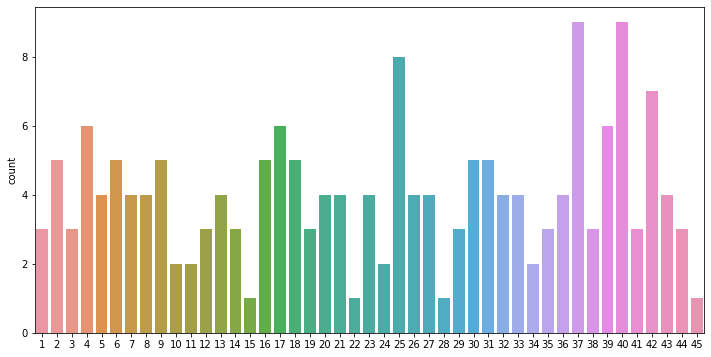

In [127]:
# 데이터 시각화까지
plt.figure(figsize=(12,6))
sns.countplot(lotto_list)
plt.show()

In [128]:
# 로또데이터 저장
resp

<Response [200]>

In [ ]:
requests.codes.ok = 200
# 100 우리 이런정보 내주는거야
# 200 성공
# 300 우리 이 사이트 이리루 이사했어 일루가
# 400 유저가 요청을 잘못한경우
# 500 서버 문제

200

In [80]:
# 차단막는 코드
seed = np.random.randint(100)
np.random.seed(seed)
a = np.random.randint(5)
time.sleep(a)

In [131]:
for item in html.select('span.ball'):
  print(item.text)

1
4
29
39
43
45
31


## **네이버 키워드로 검색한 결과를 크롤링(속성 접근)**

In [143]:
keyword = input('검색어를 입력하세요 : ')
url = f"https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={keyword}"
resp = requests.get(url)
html = BeautifulSoup(resp.text, 'html.parser')

검색어를 입력하세요 : 이어드림스쿨


In [152]:
for item in html.select('a.api_txt_lines'):
  print(item.text, item.attrs['href'])
  print('-'*300)

스타트업 AI기술인력 양성(이어드림 스쿨) 교육운영사 모집 공고_중소벤처기업부 https://blog.naver.com/ash1106/222630166306
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2022년 스타트업 AI기술인력 양성사업(이어드림 스쿨) 청년인재 모집 연장 공고 https://blog.naver.com/sdhys2/222654360952
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
중진공, 이어드림 스쿨(Year Dream School)을 소개합니다! https://blog.naver.com/sbcblog/222596245344
-----------------------------------------------------------------------------------------------------------------------------------------

    가져온 데이터에 접근을 하는 방식 자체는 판다스 색인처럼 결과값을 확인하며 진행하는 것이 가장 좋습니다.

#### 관심있는 개별종목의 시가총액, 외국인 소진률, PER, PBR 가져오기

In [231]:
# url 정의
# 시가총액, 외국인 소진률, PER, PBR
url = 'https://finance.naver.com/item/main.nhn?code=035420'
resp = requests.get(url)
html = BeautifulSoup(resp.text, 'html.parser')
print(html.select('div.wrap_company a')[0].text)
print(html.select('em#_market_sum')[0].text.replace('\n','').replace('\t',''))
print(html.select('tr.strong em')[1].text)
print(html.select('#_per')[0].text)
print(html.select('#_pbr')[0].text)
#html.select('div.first caption')[0]

NAVER
47조3,282
54.39%
2.87
1.83


#### 여러 종목의 시가총액, 외국인 소진률, PER, PBR 한꺼번에 가져오기

In [224]:
code = ['005930','035420', '035720']
for item in code:
  url = f'https://finance.naver.com/item/main.nhn?code={item}'
  resp = requests.get(url)
  html = BeautifulSoup(resp.text, 'html.parser')
  print(html.select('div.wrap_company a')[0].text)
  print(html.select('em#_market_sum')[0].text.replace('\n','').replace('\t',''))
  print(html.select('tr.strong em')[1].text)
  print(html.select('#_per')[0].text)
  print(html.select('#_pbr')[0].text)
  print('-'*10)

삼성전자
396조3,936
51.13%
11.49
1.52
----------
NAVER
47조3,282
54.39%
2.87
1.83
----------
카카오
40조305
28.75%
28.64
3.90
----------


[['462조6,581', '51.98%', '16.32', '1.92'],
 ['5,145', '11.36%', '3.64', '0.67'],
 ['32조2,118', '5.45%', '219.42', '9.55']]

In [ ]:
# 데이터프레임 제작


,시가총액,외국인소진률,PER,PBR
삼성전자,"462조6,581",51.98%,16.32,1.92
코오롱,"5,145",11.36%,3.64,0.67
카카오뱅크,"32조2,118",5.45%,219.42,9.55


## **동적페이지 크롤링**
> 최근에는 Js로 변경이 되며 일반적인 크롤링이 되지 않는 경우가 많음  
동적페이지와 숨겨진 url을 가져오는 방법을 알아봅니다

### 네이버 주식 시세 데이터 크롤링

In [ ]:
# 크롤링 -> 현업에서는 자주 쓰이는 스킬은 아님
# 필드마다 다름 -> SSG.com -> 검색개발자 -> 모델링에 필요한 학습 문자를 크롤링
# 온라인커머스 -> 타사몰에 올라가있는 상품 가격

In [270]:
# 동적페이지의 숨은 URL
# 동적페이지에 요청을 할 때 웹 정책에 필요한 정보를 같이 전달을 해줘야 함.
# requests 요청시에 헤더정보 추가
url = 'https://finance.naver.com/item/sise_day.naver?code=000660&page=2'

info = {
    'referer': 'https://finance.naver.com/item/sise_day.naver?code=000660&page=1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36'
}

# 레퍼러정보 : 이 사용자가 이 페이지에 요청하기 전 어느 페이지에 있었는지
# 유저에이전트 : 사용자컴퓨터 정보

resp = requests.get(url, headers=info)

html = BeautifulSoup(resp.text, 'html.parser')

# 크롤링 -> 현업에서는 자주 쓰이는 스킬은 아님
# 필드마다다름 -> SSG.com -> 검색개발자 -> 모델링에 필요한 학습 문자를 크롤링
# 온라인커머스 -> 타사몰에 올라가있는 상품 가격

# 컬럼명 셀렉트
col_nm = [col.text for col in html.select('th')[1:]]

# 날짜 셀렉트
index = [date.text for date in html.select('span.p10')] # tah p10 gray03

# 가격정보 셀렉트
price = [p.text.strip() for p in html.select('span.p11')] # tah p11

price = np.array(price).reshape(-1, 6)

df = pd.DataFrame(price,
                 columns=col_nm,
                 index=index)
df

,종가,전일비,시가,고가,저가,거래량
2022.04.11,"111,500",500,"111,000","113,000","110,500","2,390,786"
2022.04.08,"112,000","1,500","113,000","114,000","110,500","4,268,316"
2022.04.07,"113,500",500,"111,500","114,500","110,500","5,027,865"
2022.04.06,"113,000","3,500","114,500","115,500","113,000","4,541,938"
2022.04.05,"116,500",500,"117,500","118,000","116,000","2,101,474"
2022.04.04,"117,000","1,000","115,000","117,500","114,500","2,470,792"
2022.04.01,"116,000","2,000","117,000","117,500","116,000","3,851,558"
2022.03.31,"118,000","3,000","119,500","120,000","117,500","4,558,063"
2022.03.30,"121,000","1,000","123,000","123,000","120,500","3,436,282"
2022.03.29,"120,000","2,000","119,500","120,500","118,500","3,375,247"


In [271]:
def make_int(x):
  return int(x.replace(',', ''))

In [272]:
df['종가'] = df['종가'].apply(make_int)

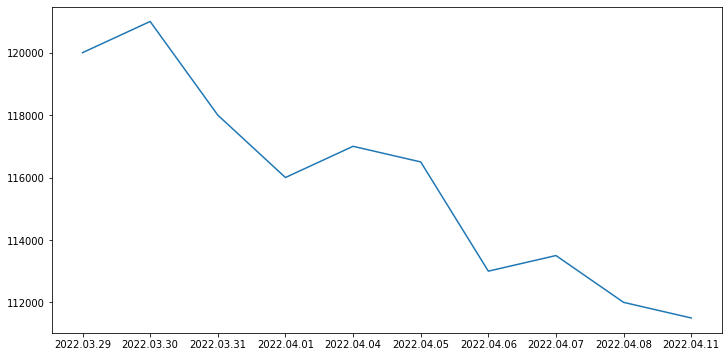

In [273]:
plt.figure(figsize=(12,6))
plt.plot(df['종가'].sort_index())
plt.show()

In [ ]:
# 콤마 제거

# 함수 적용

# 타입 변환

# 종가 그래프


### 20페이지 주가 정보 크롤링 해서 종가 그래프 출력

In [ ]:
# 헤더정보 정의 (동적페이지 헤더정보 그대로 사용)

# 인덱스 정의


# 전체 가격 데이터

# requests 요청시에 헤더정보 추가

# html 변환

# 날짜 인덱스 살려서 활용하기

# 가격정보 추출

# 데이터프레임 제작


1페이지 크롤링 중
2페이지 크롤링 중
3페이지 크롤링 중
4페이지 크롤링 중
5페이지 크롤링 중
6페이지 크롤링 중
7페이지 크롤링 중
8페이지 크롤링 중
9페이지 크롤링 중
10페이지 크롤링 중
11페이지 크롤링 중
12페이지 크롤링 중
13페이지 크롤링 중
14페이지 크롤링 중
15페이지 크롤링 중
16페이지 크롤링 중
17페이지 크롤링 중
18페이지 크롤링 중
19페이지 크롤링 중
20페이지 크롤링 중


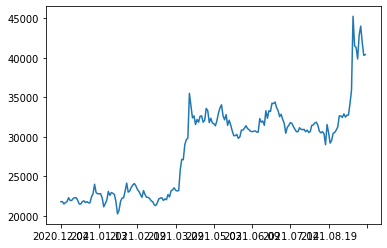

### 종목도 여러개 순환시키고 각 개별종목 데이터 csv 저장하는 연습

### 네이버 데이터랩 인기검색어 크롤링

In [289]:
# json 데이터 파싱
import json
url = "https://datalab.naver.com/shoppingInsight/getKeywordRank.naver?timeUnit=date&cid=50000001"
info = {
    'referer' : 'https://datalab.naver.com/',
    'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'
}
resp = requests.post(url,headers=info)
data = json.loads(resp.text)

In [297]:
for item in data:
  print(item['datetime'], item['ranks'][0]['keyword'])

2022.04.13.(수) 크록스
2022.04.14.(목) 크록스
2022.04.15.(금) 크록스
2022.04.16.(토) 크록스
2022.04.17.(일) 여자선글라스
2022.04.18.(월) 헤어악세사리
2022.04.19.(화) 크록스
2022.04.20.(수) 크록스
2022.04.21.(목) 크록스
2022.04.22.(금) 크록스
2022.04.23.(토) 크록스
2022.04.24.(일) 크록스


### 다음 주식 일자별 주가 데이터 크롤링 연습

In [298]:
# json -> dataFrame 
url = 'https://finance.daum.net/api/quote/A005930/days?symbolCode=A005930&page=2&perPage=10&pagination=true'
info = {
    'referer': 'https://finance.daum.net/quotes/A005930?period=day',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36'
}

resp = requests.get(url, headers=info)

data = json.loads(resp.text)

df = pd.DataFrame(data['data'])
df

,symbolCode,date,tradePrice,tradeTime,change,changePrice,changeRate,prevClosingPrice,exchangeCountry,openingPrice,highPrice,lowPrice,accTradePrice,accTradeVolume,periodTradePrice,periodTradeVolume,listedSharesCount
0,A005930,2022-04-11 15:30:16,67900.0,15:30:16,RISE,100.0,0.001475,67800.0,KOREA,67800.0,68100.0,67400.0,831094572700,12263735,831094572700,12263735,None
1,A005930,2022-04-08 15:30:12,67800.0,15:30:12,FALL,200.0,-0.002941,68000.0,KOREA,68100.0,68300.0,67700.0,1050375034852,15453191,1050375034852,15453191,None
2,A005930,2022-04-07 15:30:13,68000.0,15:30:13,FALL,500.0,-0.007299,68500.0,KOREA,68500.0,68500.0,68000.0,1409872624700,20683327,1409872624700,20683327,None
3,A005930,2022-04-06 15:30:13,68500.0,15:30:13,FALL,700.0,-0.010116,69200.0,KOREA,68600.0,68800.0,68500.0,1064606110092,15517308,1064606110092,15517308,None
4,A005930,2022-04-05 15:30:18,69200.0,15:30:18,FALL,100.0,-0.001443,69300.0,KOREA,69400.0,69600.0,69100.0,586498194900,8467248,586498194900,8467248,None
5,A005930,2022-04-04 15:30:28,69300.0,15:30:28,RISE,200.0,0.002894,69100.0,KOREA,68900.0,69300.0,68600.0,766930294459,11107905,766930294459,11107905,None
6,A005930,2022-04-01 15:30:17,69100.0,15:30:17,FALL,500.0,-0.007184,69600.0,KOREA,69500.0,69500.0,69000.0,1100422376400,15916846,1100422376400,15916846,None
7,A005930,2022-03-31 15:30:14,69600.0,15:30:14,FALL,300.0,-0.004292,69900.0,KOREA,69900.0,70200.0,69600.0,873212583300,12510366,873212583300,12510366,None
8,A005930,2022-03-30 15:30:10,69900.0,15:30:10,FALL,300.0,-0.004274,70200.0,KOREA,70300.0,70500.0,69800.0,887514318650,12670187,887514318650,12670187,None
9,A005930,2022-03-29 15:30:15,70200.0,15:30:15,RISE,500.0,0.007174,69700.0,KOREA,70000.0,70300.0,69800.0,958589509700,13686208,958589509700,13686208,None


## 파파고 API

In [331]:
def papago():
  x = input('번역이 필요한 한국어를 입력하세요 : ')
  url = 'https://openapi.naver.com/v1/papago/n2mt'
  info = {
    "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
    "X-Naver-Client-Id": "xbihPGYwBk68EUpylfys",
    "X-Naver-Client-Secret": "EP5WWfBESM"
  }
  data = {
    'source' : 'ko',
    'target' : 'en',
    'text' : x
  }
  resp = requests.post(url, headers=info, data=data)
  trans = json.loads(resp.text)
  print(trans['message']['result']['translatedText'])

In [332]:
papago()

번역이 필요한 한국어를 입력하세요 : 다들 수고하셨습니다
Great job, everyone


## 공공데이터 API

In [309]:
key = '2Kk0y1UBes%2FI5EWnFv6wKxOgEVxyr55ChP5MqVy%2FEeEFVtXeJq83IT2kLLvducMPjc5%2BJ8El7IgAb4pNRlrRPQ%3D%3D'
url = f'http://apis.data.go.kr/1790387/covid19CurrentStatusHospitalizations/covid19CurrentStatusHospitalizationsJson?serviceKey=key'

In [310]:
resp = requests.get(url)

In [311]:
resp.text

'<OpenAPI_ServiceResponse>\n\t<cmmMsgHeader>\n\t\t<errMsg>SERVICE ERROR</errMsg>\n\t\t<returnAuthMsg>SERVICE_KEY_IS_NOT_REGISTERED_ERROR</returnAuthMsg>\n\t\t<returnReasonCode>30</returnReasonCode>\n\t</cmmMsgHeader>\n</OpenAPI_ServiceResponse>'

서울특별시 중구 퇴계로36길 10(필동2가 80-2)
서울특별시 중구 퇴계로34길 28(필동2가 84-1)
서울특별시 중구 퇴계로34길 28(필동2가 84-1)
서울특별시 중구 소월로 91(남대문로5가 471)
서울특별시 중구 장충동2가 산14-21
서울특별시 중구 남산공원길 125-72(예장동 산5-6)
서울특별시 중구 예장동 8-1
서울특별시 중구 예장동 8-1
서울특별시 중구 필동로1길 30(장충동2가 192-5)
서울특별시 중구 장충단로 72(장충동2가 201-6)
